In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from train import AudioDataset
import json

# Load the ontology to obtain mapping from label ID to label name
with open('./data/ontology.json') as f: ontology = json.load(f)
ids = []
for item in ontology:
    ids.append(item['id'])
id_to_name = {item['id']: item['name'] for item in ontology}

# Load the CSV file
def load_csv_labels(file_path):
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[3:]  # Skip the first three comment lines
        for line in lines:
            parts = line.strip().split(', ')
            labels = [label.replace("\"", "") for label in parts[3].split(',')]
            data.extend(labels)  # Collect all labels into a single list
    return data

# Generate histogram
def generate_histogram(labels, n, top=True):
    label_counts = Counter(labels)  # Count the frequency of each label
    if top:
        labels = label_counts.most_common(n)
    else:
        labels = label_counts.most_common()[:-n-1:-1]

    labels, counts = zip(*labels)
    labels = [id_to_name[label] for label in labels]
    
    plt.figure(figsize=(5, 5))
    plt.barh(labels, counts)
    plt.xlabel('Frequency')
    if top:
        plt.title(f'Top {n} Most Frequent Labels in balanced_train_segments.csv')
    else:
        plt.title(f'Bottom {n} Least Frequent Labels in balanced_train_segments.csv')
    plt.show()

# Example usage
file_path = 'data/balanced_train_segments.csv'

data = load_csv_labels(file_path)
print('Dataset loaded!')

Dataset loaded!


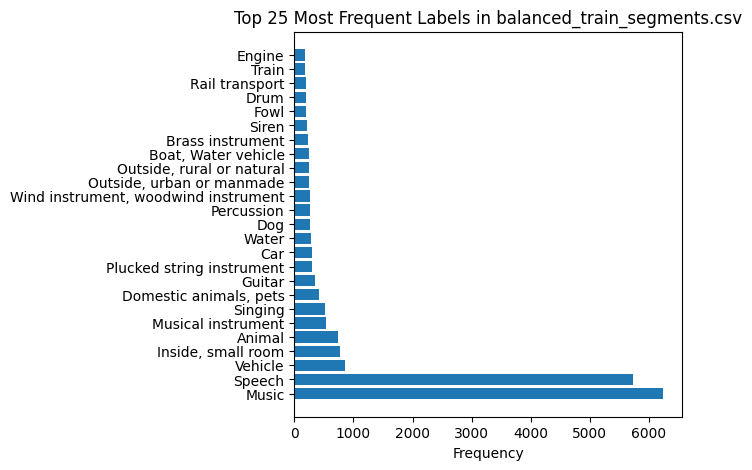

In [106]:
generate_histogram(data, n=25, top=True)

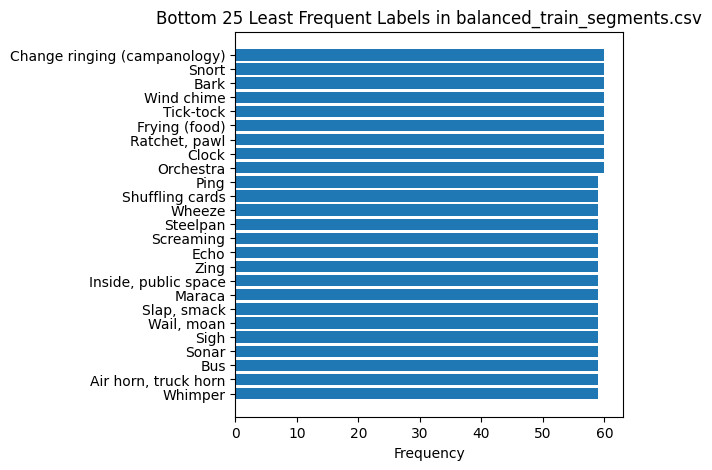

In [107]:
generate_histogram(data, n=25, top=False)